## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [4]:
features = []

remote_folder = '9_28_18_Gel_Interface_Vids' #Folder in AWS S3 containing files to be analyzed
bucket = 'mckenna.data'
vids = 5
combos = [['0_4', '0_6'], ['0_4', '0_8'], ['0_4', '1_2'], ['0_6', '0_8'], ['0_8', '1_0'], ['1_0', '1_2']]

nonnum = ['Surface Functionality', 'Slice', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']

counter = 0
for combo in combos:
    for gel in combo:
        for num in range(1, vids+1):
            try:
                filename = 'features_100x_{}_{}_gel_{}_bulk_vid_{}.csv'.format(combo[0], combo[1], gel, num)
                print(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                print('{} size: {}'.format(filename, fstats.shape))
                fstats['Interface'] = pd.Series(fstats.shape[0]*['{}/{}'.format(combo[0], combo[1])], index=fstats.index)
                fstats['Bulk Agarose'] = pd.Series(fstats.shape[0]*[gel], index=fstats.index)
                fstats['Gel Code'] = pd.Series(fstats.shape[0]*['{}/{} {}'.format(combo[0], combo[1], gel)], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('Filename missing: '.format(filename))

features_100x_0_4_0_6_gel_0_4_bulk_vid_1.csv
features_100x_0_4_0_6_gel_0_4_bulk_vid_1.csv size: (10491, 67)
features_100x_0_4_0_6_gel_0_4_bulk_vid_2.csv
features_100x_0_4_0_6_gel_0_4_bulk_vid_2.csv size: (10108, 67)
features_100x_0_4_0_6_gel_0_4_bulk_vid_3.csv
features_100x_0_4_0_6_gel_0_4_bulk_vid_3.csv size: (10808, 67)
features_100x_0_4_0_6_gel_0_4_bulk_vid_4.csv
features_100x_0_4_0_6_gel_0_4_bulk_vid_4.csv size: (11492, 67)
features_100x_0_4_0_6_gel_0_4_bulk_vid_5.csv
features_100x_0_4_0_6_gel_0_4_bulk_vid_5.csv size: (11098, 67)
features_100x_0_4_0_6_gel_0_6_bulk_vid_1.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_1.csv size: (8907, 67)
features_100x_0_4_0_6_gel_0_6_bulk_vid_2.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_2.csv size: (8389, 67)
features_100x_0_4_0_6_gel_0_6_bulk_vid_3.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_3.csv size: (7467, 67)
features_100x_0_4_0_6_gel_0_6_bulk_vid_4.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_4.csv size: (7592, 67)
features_100x_0_4_0_6_gel_0_6_bu

In [ ]:
fstats_tot.to_csv('features.csv')

In [ ]:
#PCA analyses with too many datapoints fail. You get rows with lots of NAs. I'm going to try making a subset of the data first
#and then do a PCA analysis on that.

#include all in analysis
import random
subset = np.sort(np.array(random.sample(range(fstats_tot.shape[0]), 500000)))
fstats_sub = fstats_tot.loc[subset, :].reset_index(drop=True)

In [5]:
fstats_tot['Gel Code'].unique()

array(['0_4/0_6 0_4', '0_4/0_6 0_6', '0_4/0_8 0_4', '0_4/0_8 0_8',
       '0_4/1_2 0_4', '0_4/1_2 1_2', '0_6/0_8 0_6', '0_6/0_8 0_8',
       '0_8/1_0 0_8', '0_8/1_0 1_0', '1_0/1_2 1_0', '1_0/1_2 1_2'], dtype=object)

In [6]:
for typ in fstats_tot['Bulk Agarose'].unique():
    fstats_type = fstats_tot[fstats_tot['Bulk Agarose']==typ].reset_index(drop=True)
    print(fstats_type.shape)

(158966, 71)
(86109, 71)
(118850, 71)
(72164, 71)
(75319, 71)


In [7]:
#with equal sample sizes for each particle type
import random
counter = 0
for typ in fstats_tot['Bulk Agarose'].unique():
    fstats_type = fstats_tot[fstats_tot['Bulk Agarose']==typ].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 72000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(158966, 71)
(86109, 71)
(118850, 71)
(72164, 71)
(75319, 71)


In [9]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Interface', 'Bulk Agarose', 'Gel Code', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num = fstats_sub.drop(nonnum, axis=1)
fstats_raw = fstats_num.as_matrix()
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [11]:
ncomp = 15
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.2198361331461654
1 component: 0.3259927235244946
2 component: 0.40918614846850887
3 component: 0.47918744972007954
4 component: 0.5267993099085088
5 component: 0.571683945197668
6 component: 0.6073639250437236
7 component: 0.6403017772411861
8 component: 0.6689426688848229
9 component: 0.6967811354410778
10 component: 0.7219113199382428
11 component: 0.7455422639451866
12 component: 0.7676559685037467
13 component: 0.7876062789087722
14 component: 0.8054718563018924


In [ ]:
pcadataset.components.to_csv('components.csv')

In [12]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Mean fractal_dim,Std asymmetry3,Mean Quality,asymmetry1,Std asymmetry1,Std trappedness,D_fit,trappedness,Std kurtosis,Std kurtosis,Std MSD_ratio,Std SN_Ratio,Std fractal_dim,Std SN_Ratio,kurtosis
1,Mean straightness,Mean AR,Mean_Intensity,asymmetry2,Std asymmetry2,Std boundedness,alpha,boundedness,Mean kurtosis,Std MSD_ratio,Mean MSD_ratio,D_fit,Std Quality,kurtosis,Std SN_Ratio
2,Mean efficiency,Mean asymmetry3,Mean SN_Ratio,fractal_dim,Std elongation,boundedness,Mean kurtosis,frames,MSD_ratio,Mean kurtosis,Std kurtosis,Mean SN_Ratio,Std frames,SN_Ratio,Std Quality
3,Mean Deff1,Std AR,Quality,straightness,efficiency,trappedness,straightness,Std trappedness,efficiency,D_fit,D_fit,SN_Ratio,kurtosis,Std alpha,Quality
4,Mean alpha,Std elongation,Std Deff1,asymmetry3,Mean asymmetry1,frames,Std alpha,Std boundedness,straightness,Mean MSD_ratio,Mean kurtosis,Std straightness,Mean frames,Mean_Intensity,Deff2


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [136]:
kmostat = pca.kmo(pcadataset.scaled)

0.868532396858


In [ ]:
import scipy.stats as stat
stat.bartlett(pcadataset.scaled[0, :], pcadataset.scaled[1, :], pcadataset.scaled[2, :], pcadataset.scaled[3, :])

In [ ]:
newstr = ''
for i in range(pcadataset.scaled.shape[0]-1):
    newstr = newstr + 'pcadataset.scaled[{}, :], '.format(i)

newstr = 'stat.bartlett(' + newstr + 'pcadataset.scaled[{}, :])'.format(i+1)

In [ ]:
test = eval(newstr)

In [ ]:
test

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [13]:
fstats_tot['Bulk Agarose'].unique()

array(['0_4', '0_6', '0_8', '1_2', '1_0'], dtype=object)

In [14]:
import numpy as np
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='0_4'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='0_6'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='0_8'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='1_0'].values[:, -ncomp:], axis=0)
dicti[4] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='1_2'].values[:, -ncomp:], axis=0)

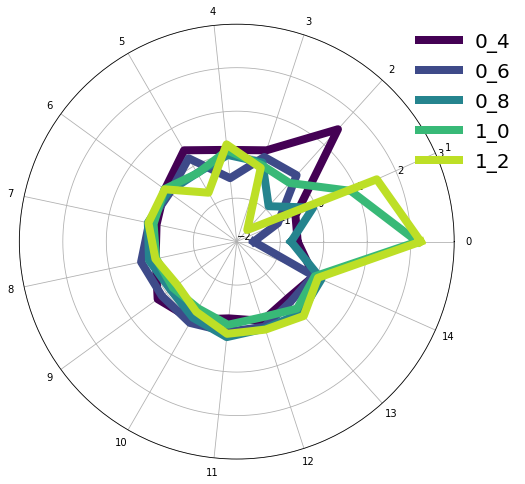

In [17]:
labels = ['0_4', '0_6', '0_8', '1_0', '1_2']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-2, 3, 6))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

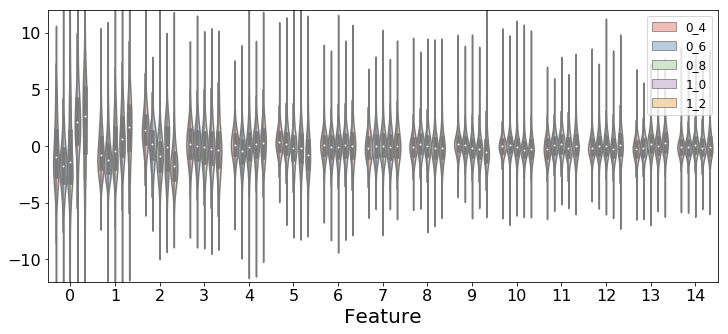

In [18]:
#labels=['10K', '5K', '1K', 'COOH']
feats = pca.feature_violin(pcadataset.final, label='Bulk Agarose', lvals=labels, fsubset=ncomp, yrange=[-12, 12])

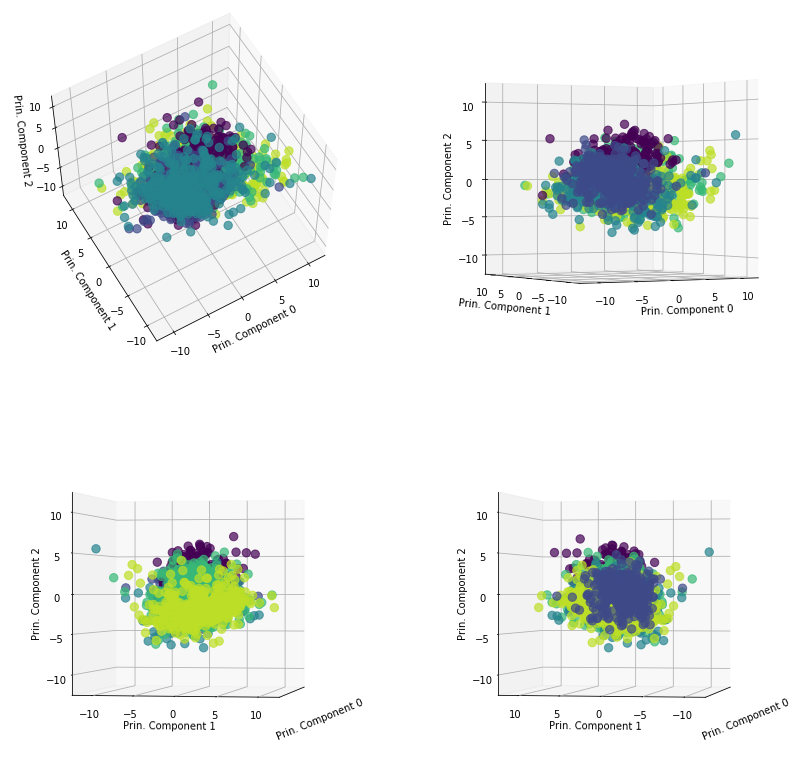

In [19]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Bulk Agarose', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12])

In [21]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Bulk Agarose', labels, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.48654694490504646
Run 1: 0.4806006163376404
Run 2: 0.49019178425053966
Run 3: 0.47220809999061414
Run 4: 0.46092552326127084
Run 5: 0.47527023433344806
Run 6: 0.4763320088852736
Run 7: 0.48880932640866004
Run 8: 0.47518224196727465
Run 9: 0.5020081813346682
Run 10: 0.46607796514720146
Run 11: 0.47036221568688796
Run 12: 0.4774954635046773
Run 13: 0.4813377968275819
Run 14: 0.4703270187404186
Run 15: 0.45902097738009573
Run 16: 0.49071582767575006
Run 17: 0.4747774770828771
Run 18: 0.49289412758502016
Run 19: 0.49928823952695306


In [22]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.5199800000000001 +/ 0.01750130280864828
0.4795186035415949 +/ 0.011612206600907816


In [24]:
from sklearn.neural_network import MLPRegressor

In [52]:
agardict = {'0_4': 0.4, '0_6': 0.6, '0_8': 0.8, '1_0': 1.0, '1_2': 1.2}
pcadataset.final['Bulk Agarose Int'] = pd.Series([0]*pcadataset.final.shape[0], index=pcadataset.final.index)
for key in agardict:
    ind1 = pcadataset.final[pcadataset.final['Bulk Agarose'] == key].index
    pcadataset.final['Bulk Agarose Int'][ind1] = agardict[key]

(158966,)
0.4
(86109,)
0.6
(118850,)
0.8
(75319,)
1.0
(72164,)
1.2


In [109]:
def build_modelR(rawdata, feature, featvals, equal_sampling=True,
                    tsize=20, from_end=True, input_cols=6, model='KNN',
                    **kwargs):
    """Builds a K-nearest neighbor model using an input dataset.

    Parameters
    ----------
    rawdata : pandas.core.frames.DataFrame
        Raw dataset of n samples and p features.
    feature : string or int
        Feature in rawdata containing output values on which KNN
        model is to be based.
    featvals : string or int
        All values that feature can take.
    equal_sampling : bool
        If True, training dataset will contain an equal number
        of samples that take each value of featvals. If false,
        each sample in training dataset will be taken randomly
        from rawdata.
    tsize : int
        Size of training dataset. If equal_sampling is False,
        training dataset will be exactly this size. If True,
        training dataset will contain N x tsize where N is the
        number of unique values in featvals.
    n_neighbors : int
        Number of nearest neighbors to be used in KNN
        algorithm.
    from_end : int
        If True, in_cols will select features to be used as
        training data defined end of rawdata e.g.
        rawdata[:, -6:]. If False, input_cols will be read
        as a tuple e.g. rawdata[:, 10:15].
    input_col : int or tuple
        Defined in from_end above.

    Returns
    -------
    clf : sklearn.neighbors.classification.KNeighborsClassifier
        KNN model
    X : numpy.ndarray
        training input dataset used to create clf
    y : numpy.ndarray
        training output dataset used to create clf

    """

    defaults = {'NNsolver': 'adam', 'NNalpha': 1e-5,
                'NNhidden_layer': (5, 2), 'NNrandom_state': 1,
                'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                }

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]
    
    if equal_sampling:
        for featval in featvals:
            if from_end:
                test = rawdata[rawdata[feature] == featval
                               ].values[:, -input_cols:]
            else:
                test = rawdata[rawdata[feature] == featval
                               ].values[:, input_cols[0]:input_cols[1]]
            to_plot = np.array(random.sample(range(0, test.shape[0]
                                                   ), tsize))
            if featval == featvals[0]:
                X = test[to_plot, :]
                y = rawdata[rawdata[feature] == featval
                            ][feature].values[to_plot]
            else:
                X = np.append(X, test[to_plot, :], axis=0)
                y = np.append(y, rawdata[rawdata[feature] == featval
                                         ][feature].values[to_plot], axis=0)

    else:
        if from_end:
            test = rawdata.values[:, -input_cols:]
        else:
            test = rawdata.values[:, input_cols[0]:input_cols[1]]
        to_plot = np.array(random.sample(range(0, test.shape[0]), tsize))
        X = test[to_plot, :]
        y = rawdata[feature].values[to_plot]

    if model is 'MLP':
        clf = MLPRegressor(solver=kwargs['NNsolver'], alpha=kwargs['NNalpha'],
                            hidden_layer_sizes=kwargs['NNhidden_layer'],
                            random_state=kwargs['NNrandom_state'],
                            beta_1=kwargs['beta_1'], beta_2=kwargs['beta_2'],
                            epsilon=kwargs['epsilon'])
    
        clf.fit(X, y)
        return clf, X, y

In [59]:
pcadataset.final.columns[-1]

'Bulk Agarose Int'

In [119]:
new_cols = [pcadataset.final.columns[-1]] + list(pcadataset.final.columns[:-1])
pcadataset.final[new_cols]
labels2 = [0.4, 0.6, 0.8, 1.0, 1.2]

MLPmod, X, y = build_modelR(pcadataset.final[new_cols], 'Bulk Agarose Int', labels2, equal_sampling=True,
                                       tsize=1000, input_cols=ncomp, model='MLP', NNhidden_layer=(13, 11, 9, 7, 5, 3))
MLPmod.score(X, y)

0.58853041755262248

In [120]:
yp = MLPmod.predict(X)

In [84]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x7fb367ce9cc0>,
 <a list of 5 Text yticklabel objects>)

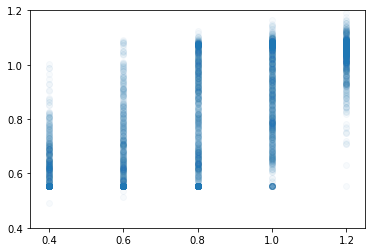

In [130]:
plt.scatter(y, yp, alpha=0.03)
plt.ylim(0.4, 1.2)
plt.xticks(labels2)
plt.yticks(labels2)

In [132]:
pcadataset.final[new_cols]

,Bulk Agarose Int,AR,Bulk Agarose,D_fit,Deff1,Deff2,Gel Code,Interface,MSD_ratio,Mean AR,...,5,6,7,8,9,10,11,12,13,14
0,0.4,1.358309,0_4,7.205140e+00,1.514626,0.267913,0_4/0_6 0_4,0_4/0_6,0.227752,1.864169,...,-0.824367,-0.815487,0.900935,-0.430860,1.182865,0.422704,-0.110063,-1.071341,-0.251354,-0.069572
1,0.4,2.296028,0_4,1.989491e+00,0.918250,0.426954,0_4/0_6 0_4,0_4/0_6,0.017754,1.834740,...,-2.032854,0.341214,1.445266,1.153019,-1.051757,-0.536738,-0.230222,-1.289371,2.254740,-0.360736
2,0.4,1.392980,0_4,2.090309e+00,0.267076,0.026330,0_4/0_6 0_4,0_4/0_6,0.135573,NaN,...,-0.118662,-1.030998,2.218090,-0.229625,-1.422991,-0.146008,1.068562,-0.989319,0.629731,-0.725380
3,0.4,1.204466,0_4,1.390846e-01,0.547194,0.257415,0_4/0_6 0_4,0_4/0_6,0.008580,inf,...,-0.000083,-1.141477,2.401281,-1.994387,0.014263,-0.383963,0.641120,-0.007444,-0.994120,0.059968
4,0.4,2.394751,0_4,5.282078e+00,0.968536,NaN,0_4/0_6 0_4,0_4/0_6,0.406196,2.112132,...,0.480629,-1.479707,-1.825441,0.654061,0.605648,-0.259893,0.298013,0.699535,0.147082,0.058796
5,0.4,1.584517,0_4,2.477412e-01,0.024022,0.002517,0_4/0_6 0_4,0_4/0_6,0.941105,1.904359,...,-0.122365,-0.121277,0.876210,0.659060,-1.669298,0.229014,0.412384,2.243989,0.051611,-1.059265
6,0.4,4.373943,0_4,1.884725e-04,0.036817,0.002317,0_4/0_6 0_4,0_4/0_6,9.563723,inf,...,-1.943443,-3.164921,1.859244,3.121902,-1.880620,0.995665,2.059280,-2.062305,-0.207207,-0.022782
7,0.4,2.003837,0_4,5.462755e-01,0.183056,NaN,0_4/0_6 0_4,0_4/0_6,0.969729,1.966799,...,0.905177,0.489662,-0.253301,-0.295337,0.708763,1.624897,-0.083601,-0.482084,-0.702366,-0.224782
8,0.4,3.500087,0_4,2.740595e-01,0.758087,0.552201,0_4/0_6 0_4,0_4/0_6,0.001075,1.962550,...,-0.680800,0.128424,0.835219,0.478062,-0.737538,0.588259,-0.431491,0.987330,0.373206,-0.559917
9,0.4,3.039133,0_4,6.771302e+00,1.849566,NaN,0_4/0_6 0_4,0_4/0_6,0.498415,1.962550,...,0.479825,-0.672791,-1.592478,1.053753,0.643297,0.439586,-0.856210,1.113450,0.575443,0.036760


In [122]:
import diff_classifier.heatmaps as hm

Plotted 100x_1_0_1_2_gel_1_2_bulk_vid_2 trajectories successfully.


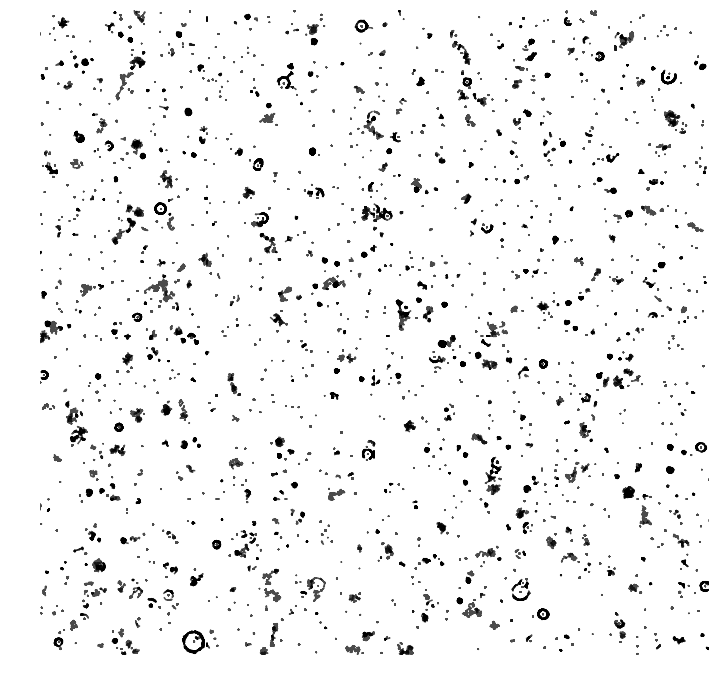

In [123]:
hm.plot_trajectories('100x_1_0_1_2_gel_1_2_bulk_vid_2', upload=False)

Plotted 100x_1_0_1_2_gel_1_2_bulk_vid_5 trajectories successfully.


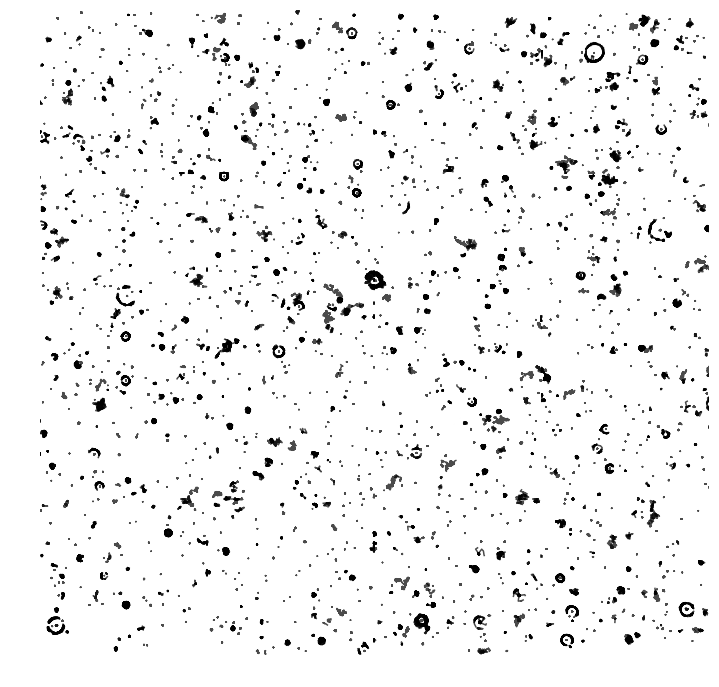

In [124]:
hm.plot_trajectories('100x_1_0_1_2_gel_1_2_bulk_vid_5', upload=False)

In [ ]:
hm.plot_trajectories('100x_1_0_1_2_gel_1_2_bulk_vid_5', upload=False)

In [ ]:
hm.plot